# Ordinary differential equations

(ODE)

We have a functional equation (the equation where the unknown is the function), that involves derivatives. This is what DE means. Ordinary means that our equation has the form (or can be converted to the form) $f'(t) = F(f(t), t)$.

Examples:

1. $f'(x) = x$ has the solution $f(x) = x^2/2 + C$. This kind of answer can be given only by symbolic computation system. In Octave we also should have some initial values for the function, for example, if we add to the statement, that $f(0) = 1$. Then, the answer is $f(x) = $x^2/2 + 1$.

    $f'(x) = x = F(f(x), x)$, where $F(y, x) = x$.

1. $f'(x) = f(x)$, $f(0) = 2$, then the general solution is $f(x) = Ce^x$. With initial values $f(x) = 2e^x$

    $f'(x) = f(x) = F(f(x), x)$, where $F(y, x) = y$.
    
    The most complex part of solving ODE in Octave is to obtain the $F$ function.
    
1. $f'(x) = x f(x) + f^2(x)$, $f(0) = ?$. We are not going to write the general solution, we are going just to write down the $F$ function.

   $f'(x) = x f(x) + f^2(x) = F(f(x), x)$, where $F(y, x) = xy + y^2$
1. $f'(x) = g(x)$; $g'(x) = -f(x)$, $f(0) = 0$, $g(0) = 1$. We just know these functions, they are $f(x) = \sin(x)$, $g(x) = \cos(x)$.

   The most interesting question here is what does $F$ look like. In Octave we can not solve an ODE with two function, but we can solve ODE with one 2-dimentionals function:
   
   Let's define $h(x) = [f(x); g(x)] = \begin{pmatrix}f(x)\\g(x)\end{pmatrix}$. Then $h'(x) = [f'(x); g'(x)] = [g(x); -f(x)]$.
   
   So, what is $F$.
   
   $h'(x) = [g(x); -f(x)] = F(h(x), x)$, where $F(y, x) = [y(2); -y(1)]$ (y is column vector with 2 elements, `y(1)`, and `y(2)`)
   
1. $f''(x) + 2f'(x) + f(x) = x$, $f(0) = 0$. We need to have only one derivative, and the idea is to introduce another function: $g(x) = f'(x)$.

    So, the first equation in our system of equation is: $f'(x) = g(x)$ (just as in the previous example!), and the second equation is $g'(x) = x - 2g(x) - f(x)$, because $g'(x) = f''(x)$. Again, introduce $h(x) = [f(x); g(x)]$.

    So, $F$ is:
    
    $h'(x) = [f'(x); g'(x)] = [g(x); x - 2g(x) - f(x)] = F(h(x), x)$, where $F(y, x) = [y(2); x - 2y(2) - y(1)]$.

 

## lsode function
This function is not included in Matlab, it has `ode45`, `ode23` and some others to choose from. We use `lsode`, because this function has been a part of Octave for a long time, while matlab compliant solvers were implemented only in last versions of Octave.

Read the help about lsode, although there is too much information we are not going to use

In [1]:
help lsode

'lsode' is a built-in function from the file libinterp/corefcn/lsode.cc

 -- [X, ISTATE, MSG] = lsode (FCN, X_0, T)
 -- [X, ISTATE, MSG] = lsode (FCN, X_0, T, T_CRIT)
     Ordinary Differential Equation (ODE) solver.

     The set of differential equations to solve is

          dx
          -- = f (x, t)
          dt

     with

          x(t_0) = x_0

     The solution is returned in the matrix X, with each row
     corresponding to an element of the vector T.  The first element of
     T should be t_0 and should correspond to the initial state of the
     system X_0, so that the first row of the output is X_0.

     The first argument, FCN, is a string, inline, or function handle
     that names the function f to call to compute the vector of right
     hand sides for the set of equations.  The function must have the
     form

          XDOT = f (X, T)

     in which XDOT and X are vectors and T is a scalar.

     If FCN is a two-element string array or a two-element cell array of


The notation in help is a little different, we write $y = f(x)$, and they write $x = x(t)$.

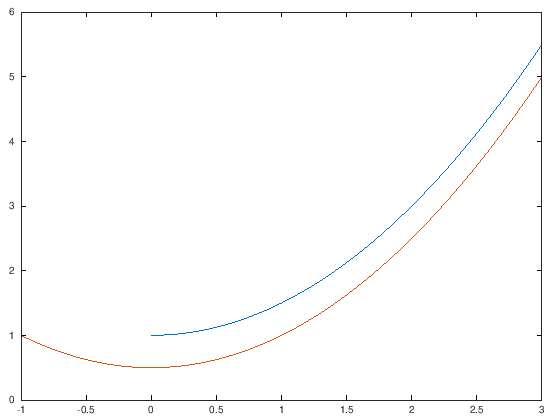

In [2]:
# 1st example

#initial values f(0) = 1

F = @(y, x) x;
y0 = 1; # this is the initial value, f(0)
x = linspace(0, 3, 100); # from 0 to 3 with a small step
y = lsode(F, y0, x);

# y is now values of our function for points in x

plot(x, y) # x^2 / 2
hold on

# another initial values f(-1) = 1
x = linspace(-1, 3, 100);
plot(x, lsode(F, 1, x))

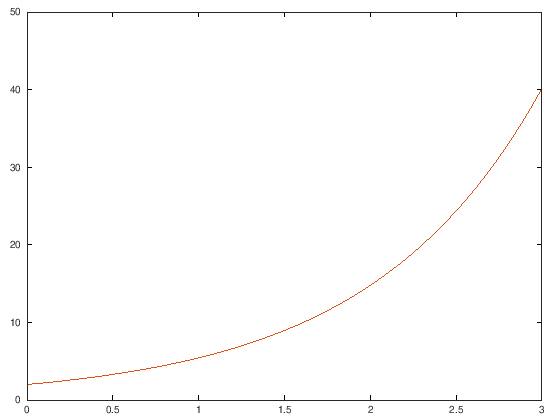

In [3]:
# 2nd example

F = @(y, x) y;
y0 = 2;
x = linspace(0, 3, 100);
y = lsode(F, y0, x);

plot(x, y)
hold on
plot(x, 2 * e .^ x) # the same answer !

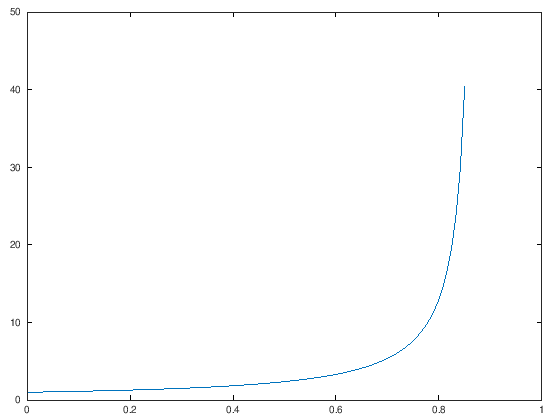

In [4]:
# 3rd example

F = @(y, x) x * y + y * y;
x = linspace(0, 0.85, 100);
y0 = 1;
y = lsode(F, y0, x);

plot(x, y) 

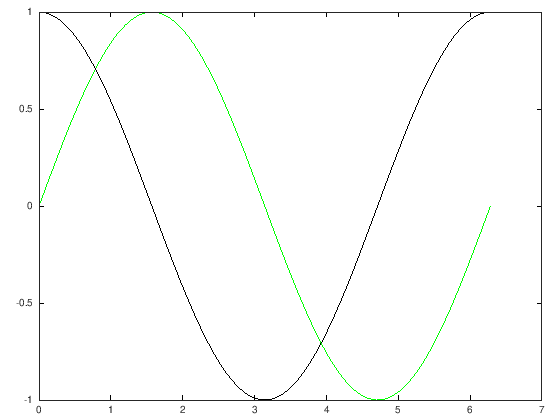

In [7]:
## example 4

F = @(y, x) [y(2), -y(1)];
y0 = [0; 1]; #initial value for h(0) = [0; 1]: f(0) = 0; g(0) = 1
x = linspace(0, 2 * pi, 100);
y = lsode(F, y0, x);

#plot(x, y) # y is two row matrix, each line is plotted separately
plot(x, y(:, 1), 'g', x, y(:, 2), 'k')  # answer functions are given by columns

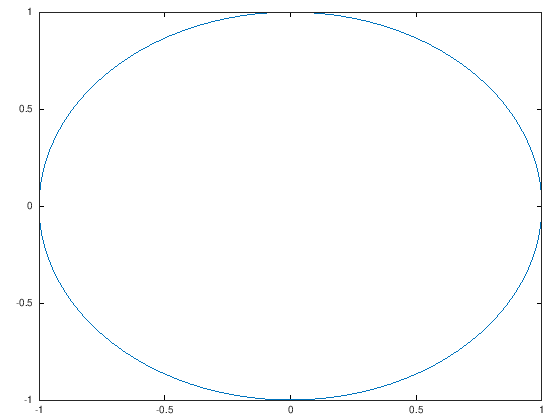

In [8]:
# there is usually a situation, where f(x) and g(x) mean coordinates of a point, and x means time.
plot(y(:, 1), y(:, 2))

You see, that sine and cosine coordinates correspond to points on a circle with radius 1.

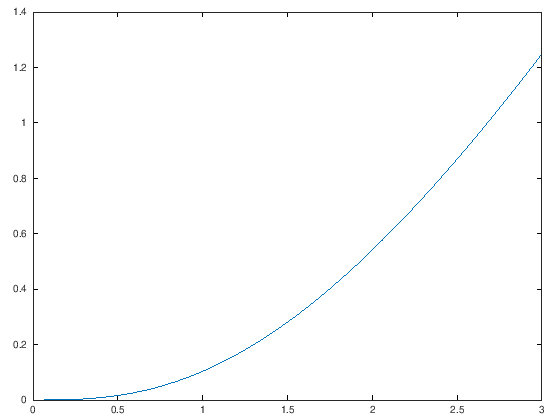

In [9]:
## example 5

F = @(y, x) [y(2), x - 2 * y(2) - y(1)];
y0 = [0; 0];
x = linspace(0, 3, 100);

y = lsode(F, y0, x);

plot(x, y(:, 1)) # we need only the first part of h(x) that is f(x), and we don't need g(x)=f'(x)